/tmp/ipykernel_15830/1477703695.py:2: DtypeWarning: Columns (1,3,6,7,10,11,12,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/workspaces/pds-2022-turquoise-team/20_intermediate_files/washington_all_counties.csv')
/tmp/ipykernel_15830/1477703695.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupedby_df_washington = df_washington.groupby(["Year_y"]).sum()
/tmp/ipykernel_15830/1477703695.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupedby_df_only_washington = df_only_washington.groupby(["Year_y"]).sum()


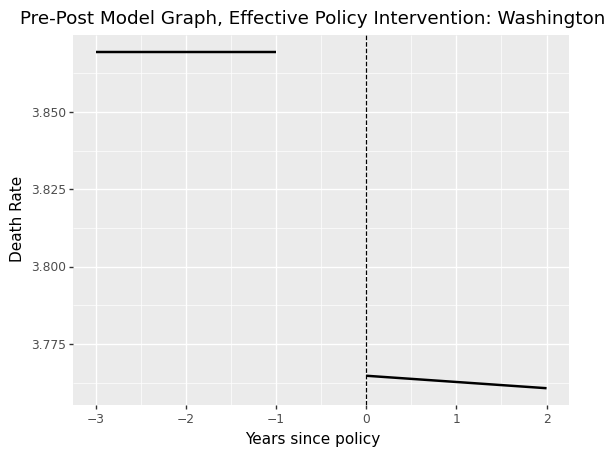

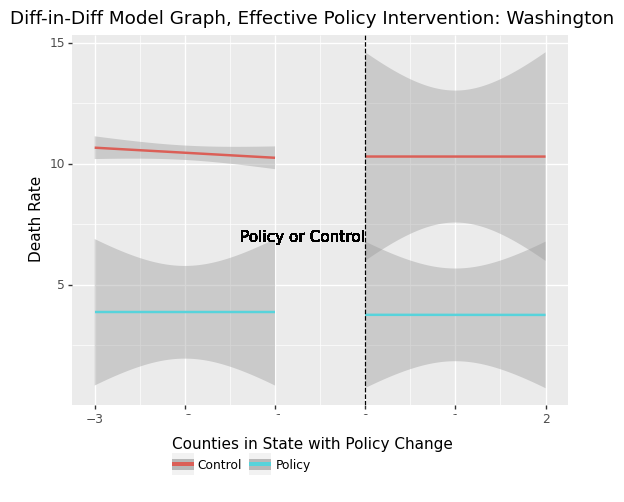

In [21]:
import pandas as pd
df = pd.read_csv('/workspaces/pds-2022-turquoise-team/20_intermediate_files/washington_all_counties.csv')
df.drop(['Crude Rate'], axis = 1)

we_want_washington = ['Alaska', 'Hawaii', 'Iowa', 'Kansas', 'Maine', 'Massachusetts',
       'Minnesota', 'Montana', 'Nebraska', 'North Dakota', 'Oregon',
       'South Dakota', 'Virginia', 'Wyoming']
df_washington = df[df['State_y'].isin(we_want_washington)]

df_washington = df_washington.drop(columns = ['State_x', 'County Code_x', 'State Code_x', 'County_x', 'Year_x', 'Population_x'])
df_washington = df_washington[df_washington['Population_y'] != 'Missing']
df_washington['Population_y'] = df_washington['Population_y'].astype('int')


groupedby_df_washington = df_washington.groupby(["Year_y"]).sum() 
groupedby_df_washington = groupedby_df_washington.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
groupedby_df_washington['Death Rate'] = (groupedby_df_washington['Deaths']/groupedby_df_washington['Population_y'])*100_000

we_want_only_washington = ['Washington']
df_only_washington = df[df['State_y'].isin(we_want_only_washington)]

groupedby_df_only_washington = df_only_washington.groupby(["Year_y"]).sum() 
groupedby_df_only_washington = groupedby_df_only_washington.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
groupedby_df_only_washington['Death Rate'] = (groupedby_df_only_washington['Deaths']/groupedby_df_only_washington['Population_x'])*100_000


def label_row(row): 
    if row['Year_y'] == 2009:
        return -3
    if row['Year_y'] == 2010: 
        return -2
    if row['Year_y'] == 2011:
        return -1
    if row['Year_y'] == 2012: 
        return 0
    if row['Year_y'] == 2013: 
        return 1
    if row['Year_y'] == 2014: 
        return 2

groupedby_df_only_washington['Years since policy'] = groupedby_df_only_washington.apply (lambda row: label_row(row), axis = 1) 

groupedby_df_washington['Years since policy'] = groupedby_df_washington.apply (lambda row: label_row(row), axis = 1) 


from plotnine import *

g = (
    ggplot(groupedby_df_only_washington, aes(x="Years since policy", y="Death Rate"))
    + geom_smooth(
        method="lm",
        data=groupedby_df_only_washington[groupedby_df_only_washington["Years since policy"] < 0],
        se=False,
    )
    + geom_smooth(
        method="lm",
        data=groupedby_df_only_washington[groupedby_df_only_washington["Years since policy"] >= 0],
        se=False,
    )
    + geom_vline(xintercept=0, linetype="dashed")
    + geom_text(x=-0.7, y=6.1, label="Policy Change", color="black")
    + labs(title="Pre-Post Model Graph, Effective Policy Intervention: Washington")
)
#g.save("images/prepost_successful.pdf")
print(g)



groupedby_df_only_washington['Policy or Control'] = 'Policy'
groupedby_df_washington['Policy or Control'] = 'Control'

washington_policy_control = pd.concat([groupedby_df_washington, groupedby_df_only_washington])

h = (
    ggplot(
        washington_policy_control,
        aes(x="Years since policy", y="Death Rate", color="Policy or Control"),
    )
    + geom_smooth(
        method="lm", data=washington_policy_control[washington_policy_control["Years since policy"] < 0]
    )
    + geom_smooth(
        method="lm", data=washington_policy_control[washington_policy_control["Years since policy"] >= 0]
    )
    + geom_vline(xintercept=0, linetype="dashed")
    + geom_text(x=-0.7, y=7, label="Policy or Control", color="black")
    + labs(
        title="Diff-in-Diff Model Graph, Effective Policy Intervention: Washington",
        color="Counties in State with Policy Change",
    )
    + theme(legend_position="bottom")
)
#g.save("images/diffindiff_successful.pdf")
print(h)

In [5]:
groupedby_df_washington.dtypes

Year_y               int64
Unnamed: 0         float64
Deaths             float64
year code combo    float64
State Code_y         int64
County Code_y        int64
Year Code            int64
dtype: object

In [6]:
df

,Unnamed: 0,State_x,State Code_x,County_x,County Code_x,Year_x,Cause of death,Cause of death Code,Deaths,Population_x,...,State_Code,County Name,year code combo,State_y,State Code_y,County_y,County Code_y,Year_y,Year Code,Population_y
0,241.0,Arkansas,5.0,"Benton County, AR",5007.0,2009.0,Accidental poisoning by and exposure to other ...,X44,12.0,216620.0,...,AR,Benton County,7016.0,Arkansas,5,"Arkansas County, AR",5001,2015,2015,18433
1,241.0,Arkansas,5.0,"Benton County, AR",5007.0,2009.0,Accidental poisoning by and exposure to other ...,X44,12.0,216620.0,...,AR,Benton County,7016.0,Arkansas,5,"Ashley County, AR",5003,2013,2013,21283
2,241.0,Arkansas,5.0,"Benton County, AR",5007.0,2009.0,Accidental poisoning by and exposure to other ...,X44,12.0,216620.0,...,AR,Benton County,7016.0,Arkansas,5,"Baxter County, AR",5005,2011,2011,41536
3,241.0,Arkansas,5.0,"Benton County, AR",5007.0,2009.0,Accidental poisoning by and exposure to other ...,X44,12.0,216620.0,...,AR,Benton County,7016.0,Arkansas,5,"Benton County, AR",5007,2009,2009,216620
4,241.0,Arkansas,5.0,"Benton County, AR",5007.0,2009.0,Accidental poisoning by and exposure to other ...,X44,12.0,216620.0,...,AR,Benton County,7016.0,Arkansas,5,"Boone County, AR",5009,2007,2007,36759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,58062.0,Wyoming,56,"Weston County, WY",56045,2017,2017,6927
83122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,58063.0,Wyoming,56,"Washakie County, WY",56043,2020,2020,7760
83123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,58063.0,Wyoming,56,"Weston County, WY",56045,2018,2018,6967
83124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,58064.0,Wyoming,56,"Weston County, WY",56045,2019,2019,6927


In [10]:
df_washington.dtypes

Unnamed: 0             float64
Cause of death          object
Cause of death Code     object
Deaths                 float64
Crude Rate              object
State_Code              object
County Name             object
year code combo        float64
State_y                 object
State Code_y             int64
County_y                object
County Code_y            int64
Year_y                   int64
Year Code                int64
Population_y            object
dtype: object

In [12]:
df_washington['Population_y'].isna().sum()

0

In [19]:
df_washington = df_washington[df_washington['Population_y'] != 'Missing']

In [20]:
df_washington['Population_y'] = df_washington['Population_y'].astype('int')

/tmp/ipykernel_15830/1450518387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_washington['Population_y'] = df_washington['Population_y'].astype('int')
